In [2]:

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from shutil import copyfile
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

TRAINING_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/training/"
VALIDATION_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/validation/"

TRAINING_HORSE_DIR = os.path.join(TRAINING_DIR, "horses/")
VALIDATION_HORSE_DIR = os.path.join(VALIDATION_DIR, "horses/")

TRAINING_HUMAN_DIR = os.path.join(TRAINING_DIR, "humans/")
VALIDATION_HUMAN_DIR = os.path.join(VALIDATION_DIR, "humans/")


In [4]:

print(f"There are {len(os.listdir(TRAINING_HORSE_DIR))} images of horses for training")
print(f"There are {len(os.listdir(TRAINING_HUMAN_DIR))} images of humans for training")
print(f"There are {len(os.listdir(VALIDATION_HORSE_DIR))} images of horses for validation")
print(f"There are {len(os.listdir(VALIDATION_HUMAN_DIR))} images of humans for validation")


There are 500 images of horses for training
There are 527 images of humans for training
There are 128 images of horses for validation
There are 128 images of humans for validation


In [23]:

1027/64


16.046875

In [167]:

256/64


4.0

In [311]:

del history, model_training, train_val_generators, model_build


NameError: name 'history' is not defined

In [5]:


def crop_center(image):
    # Assuming image is a 3D tensor of shape (height, width, channels)
    # and we want to crop to a square shape.
    original_shape = tf.shape(image)
    side_length = tf.reduce_mean([original_shape[0], original_shape[1]])
    
    # Compute offset for the crop to be centered
    offset_height = (original_shape[0] - side_length) // 3
    offset_width = (original_shape[1] - side_length) // 3
    
    # Perform the crop
    cropped_image = tf.image.crop_to_bounding_box(
        image,
        offset_height=offset_height,
        offset_width=offset_width,
        target_height=side_length,
        target_width=side_length
    )
    return cropped_image

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range = 45,
                                     # width_shift_range = 0.2,
                                     # height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     horizontal_flip = True,
                                    brightness_range=[0.2, 0.3],
                                    channel_shift_range=5,
                                     fill_mode='nearest',
                                    preprocessing_function=crop_center,
                                       zoom_range = 0.3)
    
    
        
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=64, class_mode='binary', target_size=(150, 150))
    
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, 
                                                                  batch_size=16, class_mode='binary', target_size=(150, 150))
    
    
    # train_crops = crop_generator(train_generator, CROP_LENGTH)
    # valid_crops = crop_generator(validation_generator, CROP_LENGTH)
    # 
    return train_generator, validation_generator

def model_build():
#     data_augmentation = tf.keras.Sequential([
#         layers.RandomFlip("horizontal_and_vertical"), layers.RandomRotation(0.2),
# ])
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
        tf.keras.layers.MaxPooling2D(2, 2), 
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001, momentum=0.4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

#How to set up a CV loop for a computer vision problem?

def model_training(EPOCHS, model_checkpoint_path):
    import datetime
    start_time = datetime.datetime.now()
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='val_loss', mode='min', save_best_only=True)
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)
    callbacks = myCallback()
    model = model_build()
    history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=1, callbacks=[callbacks, model_checkpoint])
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return history


In [ ]:

TRAINING_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/training/"
VALIDATION_DIR = "/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/validation/"
model_checkpoint_path = '/Users/chidam_sp/PycharmProjects/pythonProject2/Computer vision, Time series, and NLP_TF certification/horses_vs_humans/stacked_cov2d_model_2nd_attempt.h5'
history = model_training(10, model_checkpoint_path)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


2024-05-03 11:15:28.733233: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-05-03 11:15:28.733260: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-03 11:15:28.733271: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-03 11:15:28.733494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 11:15:28.733511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


In [260]:

def plot_learning_curve_metric(history, lower_limit, upper_limit):
    plt.plot(history['accuracy'], label='training_accuracy')
    plt.plot(history['val_accuracy'], label='validation_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='lower right')

def plot_learning_curve_loss(history, lower_limit, upper_limit):
    plt.plot(history['loss'], label='training_loss')
    plt.plot(history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')
    plt.show()


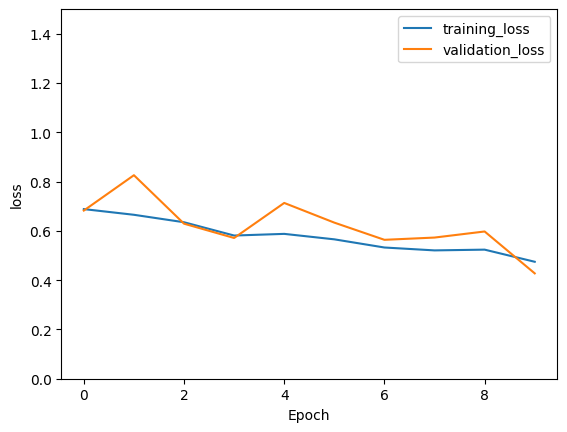

In [262]:

plot_learning_curve_loss(history.history, 0, 1.5)


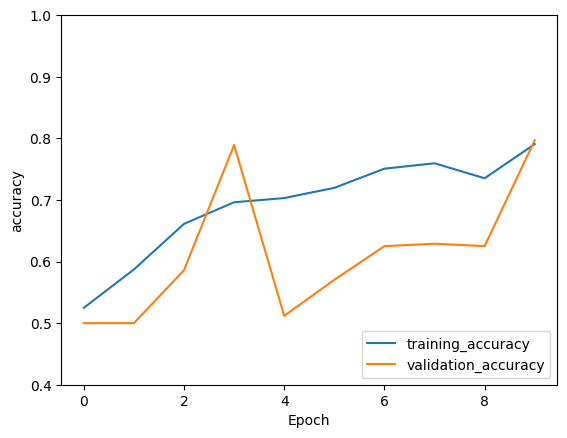

In [263]:

plot_learning_curve_metric(history.history, 0.4, 1)


In [ ]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)
        